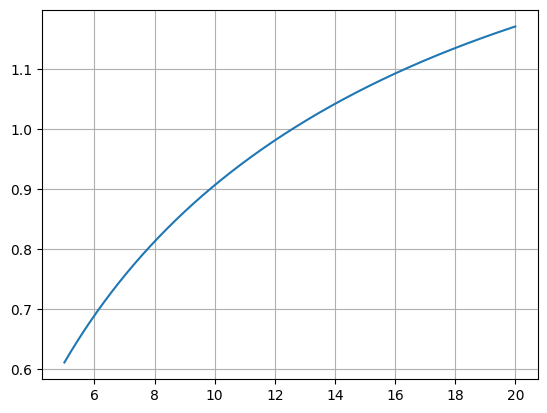

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from src.dp import UtilityFactory, value_iteration, utility_matrix

alpha = 0.4
sigma = 0.5
delta = 0.04

utility = UtilityFactory.utility1(alpha=alpha, sigma=sigma, delta=delta)
capital = np.linspace(5, 20, num=1000)

utilities = [utility(k, k) for k in capital]
plt.plot(capital, utilities)
plt.grid()

In [2]:
alpha = 0.4
delta = 0.04
sigma = 0.5
beta = 0.96
epsilon = 0.0001

capital = np.linspace(5, 20, num=1000)
u = UtilityFactory.utility1(alpha, sigma, delta)
state_values, state_path = value_iteration(capital, u, beta)

c:\Users\dstipic\Desktop\git\DP-macro\src\dp.py:11: RuntimeWarning: invalid value encountered in scalar power
  x = x**(1-sigma)


iter = 1, capital = 6.370054723199839, avg_value = 4.0267980655941065 detla=0.6103819008879403
iter = 2, capital = 8.40377992355804, avg_value = 5.355805272866738 detla=0.5886428650015694
iter = 3, capital = 9.843995805635958, avg_value = 6.360634265925616 detla=0.5700905907728346
iter = 4, capital = 11.008368746464686, avg_value = 7.218798953580023 detla=0.5540564954597191
iter = 5, capital = 12.009214558023068, avg_value = 7.989735691370464 detla=0.5398479601298571
iter = 6, capital = 12.899475018382294, avg_value = 8.700417436090554 detla=0.5268684318043879
iter = 7, capital = 13.708283517106821, avg_value = 9.365260073047668 detla=0.5145882882140438
iter = 8, capital = 14.453367631536231, avg_value = 9.99283322659529 detla=0.5026298260961937
iter = 9, capital = 15.146344879806373, avg_value = 10.588641751533574 detla=0.49075887258874373
iter = 10, capital = 15.795259012918285, avg_value = 11.156445633541708 detla=0.4788039648476923
iter = 11, capital = 16.40595710504962, avg_value 

In [8]:
state_path

array([[ 48,  94, 137, ..., 198, 112,   0],
       [ 49,  95, 138, ..., 198, 112,   0],
       [ 50,  96, 139, ..., 198, 112,   0],
       ...,
       [956, 920, 888, ..., 198, 112,   0],
       [957, 921, 888, ..., 198, 112,   0],
       [958, 921, 888, ..., 198, 112,   0]], shape=(1000, 221))

# Value of capital

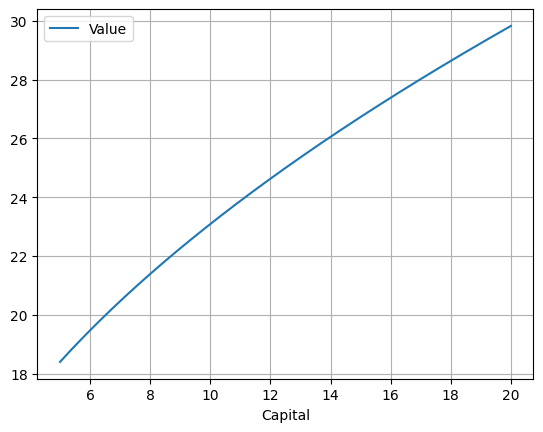

In [6]:
import pandas as pd
ds = {"Capital": [], "Value": []}
for i,v in enumerate(state_values):
    c = capital[i]
    ds['Capital'].append(c)
    ds['Value'].append(v)

df = pd.DataFrame(ds)

df.plot(x="Capital", y='Value')
plt.grid()

# Consumption for different capital

In [23]:
def production(capital, alpha):
    return capital**alpha

def consumption(k_now, k_next, alpha, delta):
    return production(k_now, alpha) + (1-delta)*k_now - k_next



# Test

In [27]:
alpha = 0.4
delta = 0.04
sigma = 0.5
beta = 0.96
epsilon = 0.0001

capital = np.linspace(5, 6, num=3)
u = UtilityFactory.utility1(alpha, sigma, delta)
print(f'CAPITAL LEVELS = {capital}')
state_values, state_path = value_iteration(capital, u, beta, max_time=4)

f = np.vectorize(lambda x: capital[x])
capital_paths = f(state_path)
capital_paths



CAPITAL LEVELS = [5.  5.5 6. ]
iter = 1, capital = 1.351222171733303, avg_value = 0.9889288459905748 detla=0.6103819008879403
iter = 2, capital = 2.0030842362333967, avg_value = 1.6053402740172853 detla=0.5859626248524228
iter = 3, capital = 2.6119551107936823, avg_value = 2.191456342469659 detla=0.5625201198583258
iter = 4, capital = 3.1964711503715564, avg_value = 2.757481971070492 detla=0.5500779237236533


array([[5.5, 5.5, 5.5, 5. ],
       [5.5, 5.5, 5.5, 5. ],
       [6. , 6. , 5.5, 5. ]])

In [ ]:
def consumption(capital_paths, production_function, delta):
    path_nums, _ = capital_paths.shape
    cs = []
    for i in range(path_nums):
        capital_t = capital_paths[i, :]
        produced_t = production_function(capital_t)
        stored_t  = (1-delta)*capital_t
        capital_next = np.append((capital_paths[i, 1:], [0]))
        consumption = produced_t - stored_t - capital_next
        cs.append(consumption)
    return np.array(cs)
        


production_function = lambda xs : production(xs, alpha)
consumption(capital_paths, production_function, delta)

TypeError: append() missing 1 required positional argument: 'values'